In [64]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('../Datasets/WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv')
df

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [3]:
df.shape[0]

9134

In [65]:
df['Engaged'] = df['Response'].apply(lambda x: 0 if x=='No' else 1)

In [12]:
df['Engaged']

0       0
1       0
2       0
3       0
4       0
       ..
9129    0
9130    1
9131    0
9132    0
9133    0
Name: Engaged, Length: 9134, dtype: int64

In [66]:
engagement_rate_df = pd.DataFrame(df.groupby('Engaged').count()['Response'] / df.shape[0] * 100)
print(engagement_rate_df)

          Response
Engaged           
0        85.679877
1        14.320123


In [16]:
educations_edu_rate_df = pd.DataFrame(df.groupby('Education').count()['Response'] / df.shape[0] * 100)

In [17]:
educations_edu_rate_df 

,Response
Education,
Bachelor,30.085395
College,29.351872
Doctor,3.744252
High School or Below,28.705934
Master,8.112547


In [31]:
educations_edu_rate_df['Response Score'] = educations_edu_rate_df['Response'].apply(lambda x: 'High' if x >= 10 else 'Low')

In [32]:
educations_edu_rate_df

,Response,Response Score
Education,,
Bachelor,30.085395,High
College,29.351872,High
Doctor,3.744252,Low
High School or Below,28.705934,High
Master,8.112547,Low


In [67]:
total_ltv_Education = df.groupby('Education').sum()['Customer Lifetime Value']

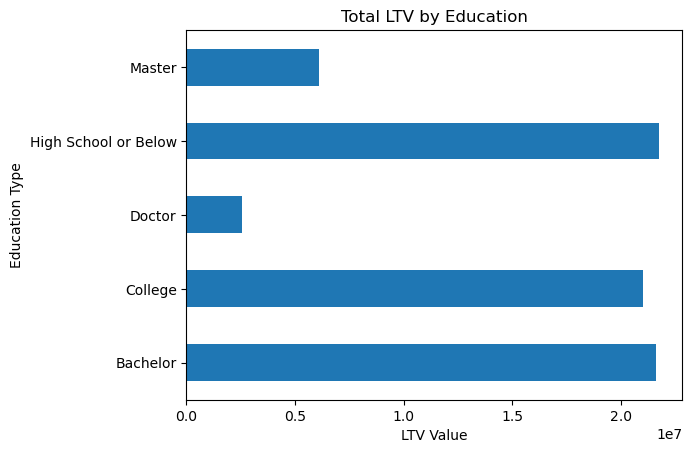

In [40]:
total_ltv_Education.plot(kind = 'barh')
plt.title('Total LTV by Education')
plt.xlabel('LTV Value')
plt.ylabel('Education Type')
plt.show()

In [68]:
engagement_by_sales_channel_df = pd.pivot_table(df, values='Response', index='Sales Channel', columns='Engaged',
aggfunc=len).fillna(0.0)
engagement_by_sales_channel_df

Engaged,0,1
Sales Channel,,
Agent,2811,666
Branch,2273,294
Call Center,1573,192
Web,1169,156


In [44]:
engagement_by_sales_channel_df.columns = ['Not Engaged', 'Engaged']
engagement_by_sales_channel_df

,Not Engaged,Engaged
Sales Channel,,
Agent,2811,666
Branch,2273,294
Call Center,1573,192
Web,1169,156


array([<AxesSubplot:title={'center':'Not Engaged'}, xlabel='Sales Channel'>,
       <AxesSubplot:title={'center':'Engaged'}, xlabel='Sales Channel'>],
      dtype=object)

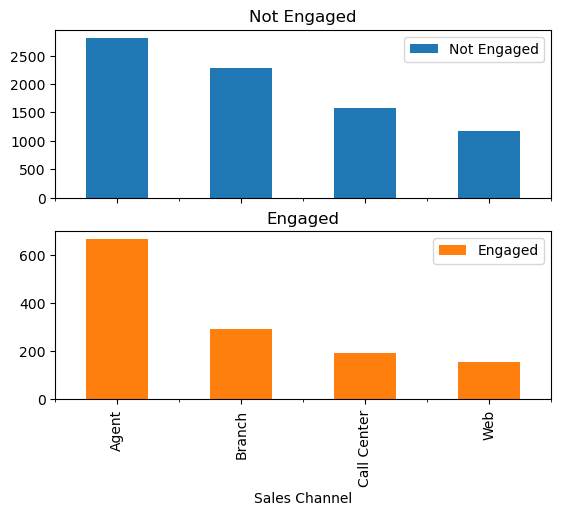

In [48]:
engagement_by_sales_channel_df.plot(kind='bar', subplots=True)

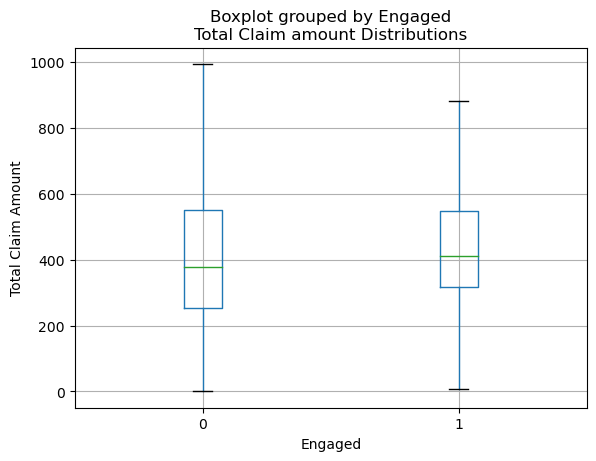

In [52]:
ax = df[['Engaged', 'Total Claim Amount']].boxplot(by='Engaged', showfliers=False)
plt.title('Total Claim amount Distributions')
plt.xlabel('Engaged')
plt.ylabel('Total Claim Amount')
plt.show()

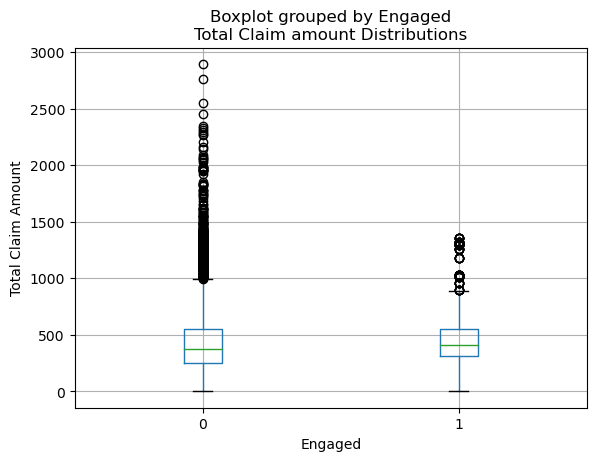

In [53]:
ax = df[['Engaged', 'Total Claim Amount']].boxplot(by='Engaged', showfliers=True)
plt.title('Total Claim amount Distributions')
plt.xlabel('Engaged')
plt.ylabel('Total Claim Amount')
plt.show()

In [56]:
df['Income'].dtype

dtype('int64')

In [58]:
df

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Engaged
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,0
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,0
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,0
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,0
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize,0
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize,1
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize,0
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large,0


In [139]:
df.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,Engaged
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794,0.143201
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092,0.350297
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007,0.000000
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244,0.000000
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434,0.000000
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839,0.000000
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678,1.000000


In [145]:
# use dataframe instead of the below

continuous_vars = ['Customer Lifetime Value', 'Income','Monthly Premium Auto','Months Since Last Claim','Months Since Policy Inception'
   ,'Number of Open Complaints', 'Number of Policies', 'Total Claim Amount']
print(continuous_vars)
#continuous_vars = continuous_vars.columns.str.strip()

['Customer Lifetime Value', 'Income', 'Monthly Premium Auto', 'Months Since Last Claim', 'Months Since Policy Inception', 'Number of Open Complaints', 'Number of Policies', 'Total Claim Amount']


In [138]:
# Use this in regression don't add in unneccessary variables.

df[['Customer Lifetime Value', 'Income','Monthly Premium Auto','Months Since Last Claim','Months Since Policy Inception','Number of Open Complaints', 'Number of Policies', 'Total Claim Amount']]

#df.iloc['continuous_vars']

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


In [125]:
# package for linear regression 

from statsmodels.api import Logit


In [152]:
# Engaged is the output and other variables are countinuous and measured against it

logit = Logit(df['Engaged'],df[['Customer Lifetime Value', 'Income','Monthly Premium Auto','Months Since Last Claim','Months Since Policy Inception','Number of Open Complaints', 'Number of Policies', 'Total Claim Amount']])

In [153]:
# Trains the regression model

logit_fit = logit.fit()

Optimization terminated successfully.
         Current function value: 0.421189
         Iterations 6


In [154]:
# Provides a summary of the regression
# p-value below 0.05 signals a strong correlation

logit_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Engaged   No. Observations:                 9134
Model:                          Logit   Df Residuals:                     9126
Method:                           MLE   Df Model:                            7
Date:                Fri, 06 Jan 2023   Pseudo R-squ.:                -0.02546
Time:                        21:56:35   Log-Likelihood:                -3847.1
converged:                       True   LL-Null:                       -3751.6
Covariance Type:            nonrobust   LLR p-value:                     1.000
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Customer Lifetime Value       -6.741e-06   5.04e-06     -1.337      0.181   -1.66e-05    3.14e-06
Income                        -2.857e-06   1.03e-06     -2.766      0.006   -4.88e-06   -8.33e-07
Monthly Premium Auto             -0.0084      0.001     -6.889      0.000      -0.011      -0.006
Months Since Last Claim          -0.0202      0.003     -7.238      0.000      -0.026      -0.015
Months Since Policy Inception    -0.0060      0.001     -6.148      0.000      -0.008      -0.004
Number of Open Complaints        -0.0829      0.034     -2.424      0.015      -0.150      -0.016
Number of Policies               -0.0810      0.013     -6.356      0.000      -0.106      -0.056
Total Claim Amount                0.0001      0.000      0.711      0.477      -0.000       0.000
=================================================================================================
"""

## Categorical Variables

#### Are harder to measure as they are not numerical and need to be converted.

In [155]:
# encodes categorical data with numerical values

gender_values, gender_labels = df['Gender'].factorize()

In [156]:
gender_values

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [157]:
gender_labels

Index(['F', 'M'], dtype='object')

In [159]:
# Encode categorical data with orderings

categories = pd.Categorical(df['Education'], categories = ['High School or Below', 'Bachelor', 'College', 'Master', 'Doctor'])
print(categories)

['Bachelor', 'Bachelor', 'Bachelor', 'Bachelor', 'Bachelor', ..., 'Bachelor', 'College', 'Bachelor', 'College', 'College']
Length: 9134
Categories (5, object): ['High School or Below', 'Bachelor', 'College', 'Master', 'Doctor']


In [163]:
# add these variables to the dataframe

df['Genderfactorised'] = gender_values
df['Educationfactorized'] = categories.codes

In [169]:
# Fit these variables to the regression model

logit = Logit(df['Engaged'], df[['Educationfactorized','Genderfactorised']])

In [170]:
logit_fit = logit.fit()

Optimization terminated successfully.
         Current function value: 0.493068
         Iterations 6


In [171]:
# - coefficient are closest to those coded 0

logit_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Engaged   No. Observations:                 9134
Model:                          Logit   Df Residuals:                     9132
Method:                           MLE   Df Model:                            1
Date:                Fri, 06 Jan 2023   Pseudo R-squ.:                 -0.2005
Time:                        22:20:07   Log-Likelihood:                -4503.7
converged:                       True   LL-Null:                       -3751.6
Covariance Type:            nonrobust   LLR p-value:                     1.000
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Educationfactorized    -0.6256      0.021    -29.900      0.000      -0.667      -0.585
Genderfactorised       -1.1266      0.047    -24.116      0.000      -1.218      -1.035
=======================================================================================
"""